# Week 10, ASTR 496: Foundations of Data Science in Astronomy

## Intro to Machine Learning

### Gautham Narayan 
##### <gsn@illinois.edu>

# Recap

- We've moved from working on single-level models to multi-level/hierarchical models 
- We've covered techniques were we explicitly write down a paramettric mdoel to "non-parametric" methods 
    - which is weird because these methods often have more parameters than parametric methods, but they're all nuisance parameters and constrained only because there is a hierarchical structure with hyperpriors

Both these trends are essentially driven by the growth in dataset size *and complexity* 

## What is Machine Learning ?

* The umbrella term "machine learning" describes methods for *automated data analysis*, developed by computer scientists and statisticians in response to the appearance of ever larger datasets.

* What is actually being learned? With GPs, you **specified** the functional form for the correlation between observations in your training set. With ML, you specify a notion of how to measure the distance between observations, and it learns the correlation structure and builds a model, $M$. 

* The goal of automation has led to an emphasis on non-parametric models (that adapt to dataset size and complexity), and a very uniform terminology that enables multiple models to be implemented and compared on an equal footing.

* Machine learning can be divided into two types: *supervised* and *unsupervised.* 

## Supervised Learning

* Supervised learning is also known as *predictive* learning. Given *inputs* $X$, the goal is to construct a machine that can accurately predict a set of *outputs* $y$, usually so that _decisions_ can be made. 


* The "supervision" refers to the education of the machine, via a *training set* $D$ of input-output pairs that we provide. Prediction accuracy is then tested on *validation* and *test* sets.

## Supervised Learning

* At the heart of the prediction machine is a *model* $M$ that can be *trained* to give accurate predictions.

* Supervised learning is about making predictions by characterizing ${\rm Pr}(y_k|x_k,D,M)$.

## Supervised Learning

* The outputs $y$ are said to be *response variables* - predictions of $y$ will be generated by our model. 

* The variables $y$ can be either *categorical* ("labels") or *nominal* (real numbers).

## Supervised Learning

* When the $y$ are categorical, the problem is one of *classification* ("is this an image of a `dog`, or my `dinner`?"). 

<img src="dog_or_dinner.jpg">

* When the $y$ are numerical, the problem is a *regression* ("how should we interpolate between these numerical values?").

<img src="house_price_features.png">

<img src="house_price_features_corr.png">

## Unsupervised Learning

* Also known as *descriptive* learning. Here the goal is "knowledge discovery" - detection of patterns in a dataset, that can then be used in supervised/model-based analyses. 


* Unsupervised learning is about *density estimation* - characterizing ${\rm Pr}(x|\theta,H)$.

## Unsupervised Learning

* Examples of unsupervised learning activities include:

  * Clustering analysis of the $x$.
  * Dimensionality reduction: principal component analysis, independent component analysis, etc.
  
  
<img src="ul_stocks_all.jpg">

<img src="ul_clusters.png">

Credit: Lorien Hayden (Cornell)

<img src="ul_sectors.png">

Credit: Lorien Hayden (Cornell)

<img src="ul_stocks.png">

Credit: Lorien Hayden (Cornell)

<img src="ul_portfolio.png">

Credit: Lorien Hayden (Cornell)

## But of course individual members of a population can look wildly different, so clustering is nice, but we want our  regression and forecasting infrastructure as well. 

## Even these can be affected by unforseen circumstances though.

<img src="ul_stocks_after_data_breach.png">

<img src="ul_vs_sl1.png">

<img src="ul_vs_sl2.png">

<img src="ul_vs_sl3.png">

<img src="ul_vs_sl4.png">

<img src="ul_vs_sl5.png">

<img src="ul_vs_sl6.png">

<img src="ul_vs_sl7.png">

<img src="ml_map.png"></img>

> The [`scikit-learn` algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), as provided with the package documentation.

## Data Representations

* Each input $x$ is said to have $P$ *features* (or *attributes*), and represents a *sample* (assumed to have been drawn from a sampling distribution). Each sample input $x$ is associated with an output $y$.


* Our $N$ input *samples* are packaged into an $N \times P$ *design matrix* $X$ (with $N$ rows and $P$ columns). We've used this term before in the context of regression and you saw an example of building one with the HBM on Cepheids

<img src="ml_data_representation.svg" width=100%>

* Typically a supervised learning model is "trained" on a subset of the data, and then its ability to make predictions about new data "tested" on the remainder.

* Training involves "fitting" the model to the data, optimizing its parameters to minimize some "loss function" (or equivalently, maximize some defined "score").

<img src="ml_supervised_workflow.svg" width=100%>

<img src="ml_train_test_split_matrix.svg" width=100%>

## Machine Learning Models

Examples of data-driven, non-parametric models for use in supervised learning include K-nearest neighbors, Support Vector Machines, Random Forest, Neural Networks, and many more. 

Many can be used for either classification or regression.

All have a number of **hyper-parameters** that govern their overall behavior, that need to be determined for any given dataset.

## Optimizing Model Prediction Accuracy

* In supervised machine learning the goal is to make the most accurate predictions we can - which means neither over-fitting nor under-fitting the data 

* The "mean squared error" between the model predictions and the truth is a useful metric: minimizing MSE corresponds to minimizing the "empirical risk," defined as the mean value loss function averaged over the available data samples, where the loss function is quadratic

<img src="overfitting_underfitting_cartoon.png">


$\;\;\;\;\;{\rm MSE} = \mathcal{E} \left[ (\hat{y} - y^{\rm true})^2 \right] = \mathcal{E} \left[ (\hat{y} - \bar{y} + \bar{y} - y^{\rm true})^2 \right] = \mathcal{E} \left[ (\hat{y} - \bar{y})^2 \right] + (\bar{y} - y^{\rm true})^2$

$\;\;\;\;\;\;\;\;\;\;\;\;\; = {\rm var}(\hat{y}) + {\rm bias}^2(\hat{y})$


* In general, different models reach different balances between the variance and bias of their predictions

* A particular choice of loss function leads to a corresponding minimized risk

## Cross-Validation

* With a single training/test split, one can characterize the _prediction error_ using, for example, the MSE. 

* The model that minimizes the *generalized prediction error* can be found (approximately) with *cross validation*, in which we consider multiple training/test splits, and look at the _mean prediction error_ across all of these _"folds."_

* How we design the folds matters: we want each subset of the data to be a _fair sample_ of the whole.

<img src="ml_grid_search_cross_validation.svg" width=100%>

* Another layer of cross validation is still needed, since we need to guard against over-fitting to this particular training set: we need to try all possible training sets.

* Once we have the hyperparameters that optimize the generalized prediction error, we can then fix them at their optimal values and train on model on the entire data set.

## Decision Tree Methods

The hierarchical application of decision boundaries lead to decision trees

Tree structure:

- top node contains the entire data set
- at each branch the data are subdivided into **two** child nodes (this is the decision)
- split is based on a predefined decision boundary (usually axis aligned)
- splitting repeats, recursively, until we reach a predefined stopping criteria

There is not one decision tree algorithm - several different versions.


Broadly though, people use two algorithms:
- Iterative Dichotomiser 3 (ID3)
- Classification and Regression Trees (CART) 
ID3 is older and simpler, but straightforward to build your own implementation of so it still hangs on. Most actual research is with CART

Application of the tree to classification is simple (a series of binary decisions). 

The fraction of points from the training set classified as one class or the other defines the class associated with the decision.

## In-class exercise 

#### Look at the table below and pick the feature that is best to split on first

#### Remember that you only get to make a binary split (i.e. mild or not mild)

In [1]:
# RUN THIS
import astropy.table as at
import graphviz 
weather = at.Table.read('weather_nominal.csv', format='ascii')
weather

outlook,temperature,humidity,windy,play
str8,str4,str6,str5,str3
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes


In [2]:
# RUN THIS

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# convert the labels to numerical data
cols = []
new_weather = weather.copy()
for i, feature in enumerate(weather.colnames):
    le = preprocessing.LabelEncoder()
    new_weather[feature] = le.fit_transform(weather[feature])*1.
new_weather = new_weather.to_pandas()
new_weather

,outlook,temperature,humidity,windy,play
0,2.0,1.0,0.0,0.0,0.0
1,2.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0
5,1.0,0.0,1.0,1.0,0.0
6,0.0,0.0,1.0,1.0,1.0
7,2.0,2.0,0.0,0.0,0.0
8,2.0,0.0,1.0,0.0,1.0
9,1.0,2.0,1.0,0.0,1.0


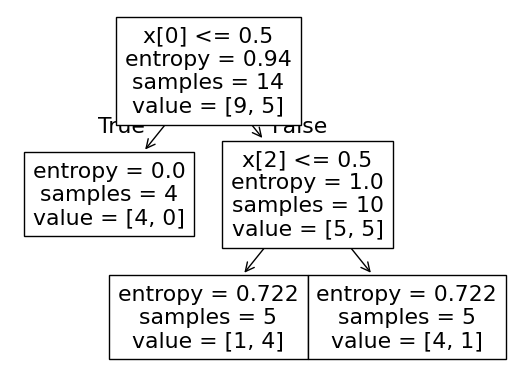

In [3]:
# get the training features and target
X_train = new_weather[weather.colnames[0:4]]
Y_train = 1.-new_weather['play']

# TWO LINES OF CODE TO IMPLEMENT A DECISION TREE

# build the decision tree
clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy')

# Step 3: Train the model on the data
clf.fit(X_train, Y_train)

# Plot the Tree
tree.plot_tree(clf);


Decision trees are simple to interpret (a set of questions).

[This structure is called a Dendrogram](https://en.wikipedia.org/wiki/Dendrogram)

<img src="tree_components.png">

## OK, so how to pick what decision to make? 

i.e. How do we choose the best attribute to divide the data set on

You need a **metric** to measure how good your feature is at predicting the desired output

`sklearn` gives you two options
- Entropy
    - and a related quantity, the Information Gain
- Gini index

We are performing top-down search through the space of possible decision trees, and optimizing this metric

## Entropy:

The entropy (we've seen this before):
\begin{equation}
\huge
H(S)=\sum_{i=1}^{c}-p_{i} \log _{2} p_{i}
\end{equation}

If you imagine a system with two states $S$ (+) and (-) then visually:

<img src="entropy_twoclass.png">

States with low entropy having high *purity* - they're more homogenous 

If a state has an entropy that is greater than zero, you can keep trying to make decisions - i.e. split further

In [5]:
# You can compute the entropy with scipy pretty easily, but practically you won't have to do this manually
import numpy as np
import scipy.stats as st
pick1 = np.arange(0, 8, 1)
for p1 in pick1:
    p2 = 14 - p1
    print(f'Entropy for {p1, p2}: {st.entropy([p1,p2], base=2):.2f}')

Entropy for (np.int64(0), np.int64(14)): 0.00
Entropy for (np.int64(1), np.int64(13)): 0.37
Entropy for (np.int64(2), np.int64(12)): 0.59
Entropy for (np.int64(3), np.int64(11)): 0.75
Entropy for (np.int64(4), np.int64(10)): 0.86
Entropy for (np.int64(5), np.int64(9)): 0.94
Entropy for (np.int64(6), np.int64(8)): 0.99
Entropy for (np.int64(7), np.int64(7)): 1.00


And the 
## Information gain:

in terms of the Entropy


\begin{equation}
\huge
I(\text{parent}, \text{child})=H(\text{parent})-H(\text{parent}|\text{child})
\end{equation}

The second term has two values since each parent node in the decision tree has two children - weight by fraction of the population at each child (default - there are other weighting schemes).


You can measure the entropy with a log of any base, but 2 is conventional because in that case, the entropy is in units of *binary digits* or **bits.** 

This can be directly interpreted in the information processing sense as the number of bits required to represent the event. 

This quantity is also often called the **Kullback Leibler divergence** or just **KL divergence**

\begin{equation}
\huge
I(\text{parent}, \text{child})=H(\text{parent})-H(\text{parent}|\text{child})
\end{equation}

# <center> This is a distance </center>

This is really what we are specifying with all ML algorithms

Note the difference with what we did earlier
* with parameteric methods, you defined the model in terms of parameters you knew were interesting
    * and wrote down a likelihood which is a distance between your model and some of the observations (a training set)

* With non-parametric methods, you didn't define a model, but you did define some basis (sines or Gaussians but many other options) 
    * expressed in terms of the variable you decided were interesting (time/position/whatever)
        * and wrote down a form for the correlation between different values of that variable - the kernel
            * you held out some of your observations as a training set 
                * which let you compute a covariance matrix given your kernel 
                    * which let you write down a likelihood which is a distance between the conditioned model and the training set

* Now you aren't even defining what the variables in the model are, but you are defining a measure of importance that can be used to weight each state in your model
    * and a form for the distance between two states in terms of infromation that is gained or loss - a **loss function**
        * and you hold out some of your observations as a training set
            * and minimize the loss function to condition the model
                * which in supervised learning is reducing the entropy at each node 
                    (i.e. making decisions such that the output is a more homogenous subset)
   

## Gini Impurity

1. Randomly pick a datapoint in our dataset
2. Randomly classify it according to the class distribution in the dataset
    (i.e. if you 6 red, 2 green, 3 blue things in some dataset with 11 samples, then (6/11, 2/11 and 3/11 respectively)
    
### What’s the probability we classify the datapoint (in)correctly? 

The answer to that question is the Gini (Im)purity.

\begin{equation}
\huge
G(S)=\sum_{i=1}^{C} p(i) \cdot(1-p(i))
\end{equation}

And the Gini gain

\begin{equation}
\huge
I(\text{parent}, \text{child})=G(\text{parent})-G(\text{parent}|\text{child})
\end{equation}

Yup. This is a distance.

## Caveat Emptor

* Machine learning algorithms are designed to make good use of big, complex datasets, where there are likely to be many more correlations and connections than we have thought of yet. 


* In this approach we assume that we will be able to make better predictions by using flexible, "non-parametric" methods that scale with the size of the dataset and allow new relationships to emerge empirically


* Additional work needs to be done to extract a full Bayesian posterior PDF (or even frequentist confidence intervals) for the model parameters - which are typically not the focus of a machine learning analysis.